In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Read data
data = pd.read_csv("/content/Corona_NLP_test.csv")

# Preprocessing
data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"http\S+", "")
data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"@\S+", "")
data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"[^a-zA-Z0-9\s]", "") # Updated regex
data['OriginalTweet'] = data['OriginalTweet'].str.lower()
data = data[data['OriginalTweet'].notna() & data['OriginalTweet'] != ""]

<ipython-input-3-02f12887812b>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"http\S+", "")
<ipython-input-3-02f12887812b>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"@\S+", "")
<ipython-input-3-02f12887812b>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"[^a-zA-Z0-9\s]", "") # Updated regex


In [4]:
print(data)

      UserName  ScreenName             Location     TweetAt  \
0            1       44953                  NYC  02-03-2020   
1            2       44954          Seattle, WA  02-03-2020   
2            3       44955                  NaN  02-03-2020   
3            4       44956          Chicagoland  02-03-2020   
4            5       44957  Melbourne, Victoria  03-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                          OriginalTweet           Sentiment  
0     trending new yorkers encounter empty supermark...  Extremely Negative  
1     when i couldnt find hand sanitizer at fred mey...            Positive  
2     fin

In [5]:
# Save cleaned data to a new CSV file
data.to_csv("Cleaned_Corona_NLP_test.csv", index=False)

In [6]:
data = pd.read_csv("/content/Cleaned_Corona_NLP_test.csv")

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd# Tokenization
data['tokens'] = data['OriginalTweet'].apply(word_tokenize)
print(data['tokens'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       [trending, new, yorkers, encounter, empty, sup...
1       [when, i, couldnt, find, hand, sanitizer, at, ...
2       [find, out, how, you, can, protect, yourself, ...
3       [panic, buying, hits, newyork, city, as, anxio...
4       [toiletpaper, dunnypaper, coronavirus, coronav...
                              ...                        
3793    [meanwhile, in, a, supermarket, in, israel, pe...
3794    [did, you, panic, buy, a, lot, of, nonperishab...
3795    [asst, prof, of, economics, was, on, talking, ...
3796    [gov, need, to, do, somethings, instead, of, b...
3797    [i, and, members, are, committed, to, the, saf...
Name: tokens, Length: 3798, dtype: object


In [10]:
# Stopword removal
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['tokens_no_stopwords'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
print(data['tokens_no_stopwords'])

0       [trending, new, yorkers, encounter, empty, sup...
1       [couldnt, find, hand, sanitizer, fred, meyer, ...
2               [find, protect, loved, ones, coronavirus]
3       [panic, buying, hits, newyork, city, anxious, ...
4       [toiletpaper, dunnypaper, coronavirus, coronav...
                              ...                        
3793    [meanwhile, supermarket, israel, people, dance...
3794    [panic, buy, lot, nonperishable, items, echo, ...
3795    [asst, prof, economics, talking, recent, resea...
3796    [gov, need, somethings, instead, biar, je, rak...
3797    [members, committed, safety, employees, enduse...
Name: tokens_no_stopwords, Length: 3798, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
# Count word frequencies
word_freq = pd.Series([word for tokens in data['tokens_no_stopwords'] for word in tokens]).value_counts()
print(word_freq)

covid19        2497
coronavirus    1512
food           1332
store          1008
grocery         815
               ... 
hoodrules         1
preys             1
targets           1
amping            1
endusers          1
Length: 11579, dtype: int64


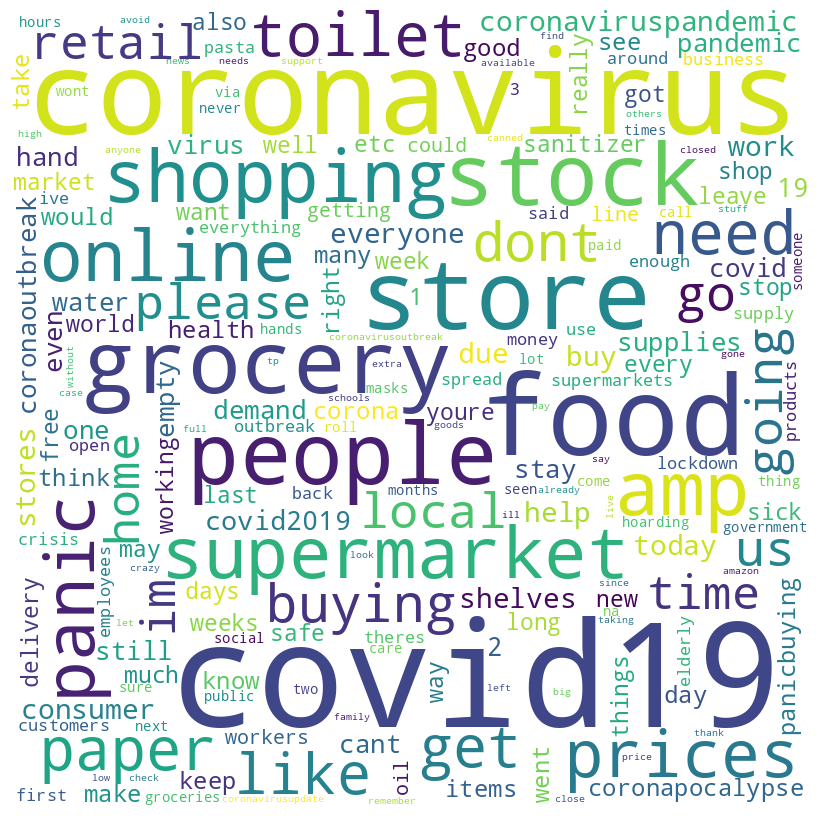

In [12]:
# Create word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(word_freq)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()